In [1]:
from pathlib import Path
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from nltk.corpus import stopwords
import nltk
from operator import itemgetter
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import imageio
from wordcloud import WordCloud
from textatistic import Textatistic
from textblob import Word
from collections import Counter
from matplotlib import pyplot as plt

In [2]:
blob = TextBlob(Path('Pride and Prejudice.txt').read_text(encoding='utf-8'))

In [3]:
blob.sentences

[Sentence("﻿
 
 Chapter 1
 
       It is a truth universally acknowledged, that a single man in
       possession of a good fortune, must be in want of a wife."),
 Sentence("However little known the feelings or views of such a man may be
       on his first entering a neighbourhood, this truth is so well
       fixed in the minds of the surrounding families, that he is
       considered as the rightful property of some one or other of their
       daughters."),
 Sentence("“My dear Mr. Bennet,” said his lady to him one day, “have you
       heard that Netherfield Park is let at last?”
 
       Mr. Bennet replied that he had not."),
 Sentence("“But it is,” returned she; “for Mrs. Long has just been here, and
       she told me all about it.”
 
       Mr. Bennet made no answer."),
 Sentence("“Do not you want to know who has taken it?” cried his wife
       impatiently."),
 Sentence("“_You_ want to tell me, and I have no objection to hearing it.”
 
       This was invitation enough."),
 Se

In [4]:
text = Path('Pride and Prejudice.txt').read_text(encoding='utf-8')
readability = Textatistic(text)
readability.dict()

{'char_count': 576008,
 'word_count': 125194,
 'sent_count': 7292,
 'sybl_count': 166457,
 'notdalechall_count': 23699,
 'polysyblword_count': 9238,
 'flesch_score': 76.92526865462236,
 'fleschkincaid_score': 6.79497559657954,
 'gunningfog_score': 9.819050350477013,
 'smog_score': 9.55909425284403,
 'dalechall_score': 7.477085151905241}

In [5]:
blob.sentiment

Sentiment(polarity=0.136161592803913, subjectivity=0.5203451280709057)

In [6]:
blob = TextBlob(Path('Pride and Prejudice.txt').read_text(encoding='utf-8'), analyzer=NaiveBayesAnalyzer())
blob.sentiment

Sentiment(classification='pos', p_pos=1.0, p_neg=0.0)

#### The book has an overall positive tone and is more opinion based

In [7]:
words_1= blob.words.lower()
words_1

WordList(['\ufeff', 'chapter', '1', 'it', 'is', 'a', 'truth', 'universally', 'acknowledged', 'that', 'a', 'single', 'man', 'in', 'possession', 'of', 'a', 'good', 'fortune', 'must', 'be', 'in', 'want', 'of', 'a', 'wife', 'however', 'little', 'known', 'the', 'feelings', 'or', 'views', 'of', 'such', 'a', 'man', 'may', 'be', 'on', 'his', 'first', 'entering', 'a', 'neighbourhood', 'this', 'truth', 'is', 'so', 'well', 'fixed', 'in', 'the', 'minds', 'of', 'the', 'surrounding', 'families', 'that', 'he', 'is', 'considered', 'as', 'the', 'rightful', 'property', 'of', 'some', 'one', 'or', 'other', 'of', 'their', 'daughters', '“', 'my', 'dear', 'mr', 'bennet', '”', 'said', 'his', 'lady', 'to', 'him', 'one', 'day', '“', 'have', 'you', 'heard', 'that', 'netherfield', 'park', 'is', 'let', 'at', 'last', '”', 'mr', 'bennet', 'replied', 'that', 'he', 'had', 'not', '“', 'but', 'it', 'is', '”', 'returned', 'she', '“', 'for', 'mrs', 'long', 'has', 'just', 'been', 'here', 'and', 'she', 'told', 'me', 'all', 

In [8]:
stop= stopwords.words('english')


In [9]:
add_words = ['’','‘','”','“','–','?','!','why','how','when','where','whenever','chapter','whom','whose','\ufeff']
stop.extend(add_words)
items = blob.word_counts.items()
items = [item for item in items if item[0] not in stop]
items

[('1', 3),
 ('truth', 27),
 ('universally', 3),
 ('acknowledged', 20),
 ('single', 12),
 ('man', 147),
 ('possession', 10),
 ('good', 182),
 ('fortune', 39),
 ('must', 318),
 ('want', 44),
 ('wife', 47),
 ('however', 135),
 ('little', 189),
 ('known', 57),
 ('feelings', 86),
 ('views', 11),
 ('may', 205),
 ('first', 145),
 ('entering', 9),
 ('neighbourhood', 29),
 ('well', 213),
 ('fixed', 22),
 ('minds', 4),
 ('surrounding', 2),
 ('families', 6),
 ('considered', 23),
 ('rightful', 1),
 ('property', 10),
 ('one', 275),
 ('daughters', 50),
 ('dear', 158),
 ('mr', 783),
 ('bennet', 324),
 ('said', 402),
 ('lady', 191),
 ('day', 133),
 ('heard', 86),
 ('netherfield', 73),
 ('park', 22),
 ('let', 75),
 ('last', 118),
 ('replied', 103),
 ('returned', 44),
 ('mrs', 344),
 ('long', 115),
 ('told', 68),
 ('made', 126),
 ('answer', 64),
 ('know', 239),
 ('taken', 31),
 ('cried', 91),
 ('impatiently', 5),
 ('tell', 71),
 ('objection', 15),
 ('hearing', 24),
 ('invitation', 34),
 ('enough', 105),

In [10]:
sorted_items = sorted(items, key=itemgetter(1), reverse=True)
top10 = sorted_items[0:15]
top10

[('mr', 783),
 ('elizabeth', 630),
 ('could', 525),
 ('would', 468),
 ('darcy', 417),
 ('said', 402),
 ('mrs', 344),
 ('much', 328),
 ('bennet', 324),
 ('must', 318),
 ('bingley', 306),
 ('jane', 287),
 ('miss', 283),
 ('one', 275),
 ('know', 239)]

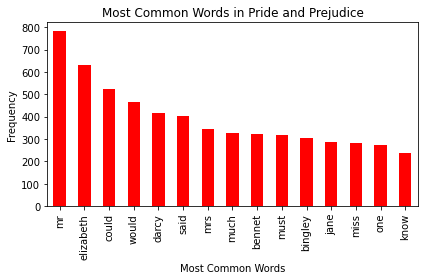

In [11]:
df= pd.DataFrame(top10,columns=['word','count'])
axes = df.plot.bar(x='word', y='count', legend=False,color = 'red')
plt.xlabel('Most Common Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in Pride and Prejudice')
plt.gcf().tight_layout()



In [12]:
phrases=blob.noun_phrases


In [13]:
f= Counter(phrases)
sort_phrases = sorted(f.items(), key=lambda x: x[1], reverse=True)
top_phrase= sort_phrases[0:10]


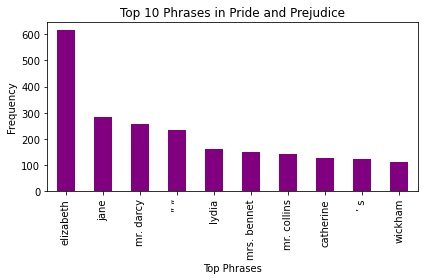

In [14]:
df_1= pd.DataFrame(top_phrase,columns=['Phrases','count'])
axes = df_1.plot.bar(x='Phrases', y='count', legend=False,color = 'purple')
plt.xlabel('Top Phrases')
plt.ylabel('Frequency')
plt.title('Top 10 Phrases in Pride and Prejudice')
plt.gcf().tight_layout()



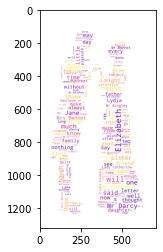

In [15]:
text = Path('Pride and Prejudice.txt').read_text(encoding='utf-8')
mask_image = imageio.imread('Events-Gilbert-Whites-House.png')
wordcloud = WordCloud(colormap='plasma',mask=mask_image,background_color='white')
wordcloud = wordcloud.generate(text)
wordcloud = wordcloud.to_file('Events-Gilbert-Whites-House_2.png')
plt.imshow(wordcloud)

In [16]:
z=Counter(blob.tags)

sort_tags = sorted(z.items(), key=lambda h: h[1], reverse=True)
top_tags= sort_tags[0:10]
top_tags

[(('the', 'DT'), 4213),
 (('to', 'TO'), 4150),
 (('of', 'IN'), 3689),
 (('and', 'CC'), 3439),
 (('I', 'PRP'), 2029),
 (('a', 'DT'), 1946),
 (('was', 'VBD'), 1837),
 (('in', 'IN'), 1830),
 (('her', 'PRP$'), 1695),
 (('not', 'RB'), 1521)]

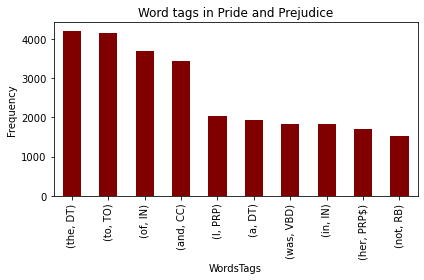

In [17]:
df_2= pd.DataFrame(top_tags,columns=['Top_Tags','count'])
axes = df_2.plot.bar(x='Top_Tags', y='count', legend=False,color = 'maroon')
plt.xlabel('WordsTags')
plt.ylabel('Frequency')
plt.title('Word tags in Pride and Prejudice')
plt.gcf().tight_layout()
